# Probability - Coin Flips and Experiments 

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np 

import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")     # See more styling options here: https://seaborn.pydata.org/tutorial/aesthetics.html

In [1]:
np.random.uniform(low=0.0, high=1.0)  

NameError: name 'np' is not defined

In [ ]:
# generate a 'flip'
def flip(num = 1):
    flips = [] 
    
    for i in range(num): 
        num = np.random.uniform(low=0.0, high=1.0)      
        if num > 0.75: 
            flips.append('H')             # should be doing yield here if you know 'generators'
        else: 
            flips.append('T')
    return flips

In [ ]:
flip()

['T']

In [ ]:
flips = flip(10) 
print(flips)

['T', 'H', 'T', 'H', 'H', 'T', 'T', 'T', 'H', 'T']


In [ ]:
values, counts = np.unique(flips, return_counts=True)

In [ ]:
values, counts

(array(['H', 'T'], dtype='<U1'), array([4, 6]))

## Repdoducible 'Randomness' 

In [ ]:
# computers are 'deterministic'. You can not do 'random' in computers! 
# So, you start with some 'seed' then do deterministic things 
# this is called pseudo-randomness 

# sometimes you want to suppress this! 

np.random.seed(0)   # random numbers and seed 

In [ ]:
np.random.uniform(low=0.0, high=1.0)  

0.5488135039273248

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np 

import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")     # See more styling options here: https://seaborn.pydata.org/tutorial/aesthetics.html


np.random.seed(1337)   # random numbers and seed 


# generate a 'flip'
def flip(num = 1):
    flips = [] 
    
    for i in range(num): 
        num = np.random.uniform(low=0.0, high=1.0)      
        if num > 0.75: 
            flips.append('H')             # should be doing yield here if you know 'generators'
        else: 
            flips.append('T')
    return flips


# Flip 
flips = flip(10) 
values, counts = np.unique(flips, return_counts=True)

# print values/stats
# print(flip())
print(flips)
print(values, counts)

['T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T']
['H' 'T'] [1 9]


## Probability of Flips 

In [ ]:
from collections import Counter, defaultdict 


def get_freqs(flips): 
    keys = Counter(flips).keys()
    vals = Counter(flips).values()  
    
    # print(keys)
    # print(vals) 
    
    # return dict(zip(keys, vals))     # bug: what if there are no 'H' or no 'T'

    return defaultdict(int, dict(zip(keys, vals)))

In [ ]:
freqs = get_freqs(flips)
print(freqs)

defaultdict(<class 'int'>, {'T': 9, 'H': 1})


In [ ]:
prob_h = freqs['H'] / len(flips)
print(prob_h)

0.1


## Experiment: Prob calculated based on 1 flip upto N flips 

In [ ]:
maximum_flips = 1000

probs = [] 
for num_flips in range(1, maximum_flips):
    flips = flip(num_flips)
    freqs = get_freqs(flips)
    prob_h = freqs['H'] / len(flips)

    probs.append(prob_h)
    
# print(probs)

In [ ]:
print(freqs)

defaultdict(<class 'int'>, {'T': 740, 'H': 259})


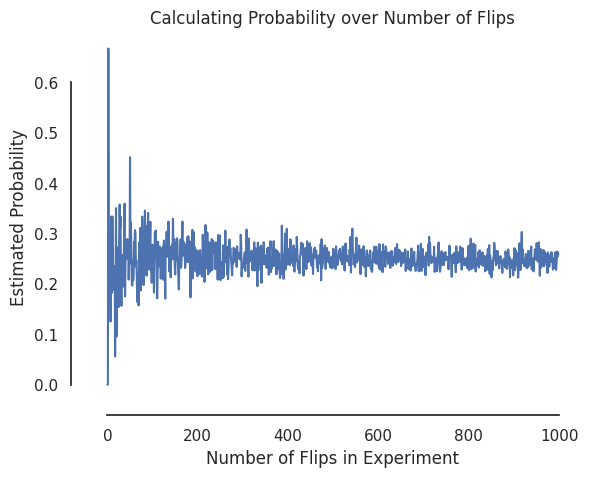

In [ ]:
plt.plot(probs)
plt.ylabel('Estimated Probability')
plt.xlabel('Number of Flips in Experiment');
plt.title("Calculating Probability over Number of Flips")
sns.despine(offset=10, trim=True);  # move axes away 
plt.show()

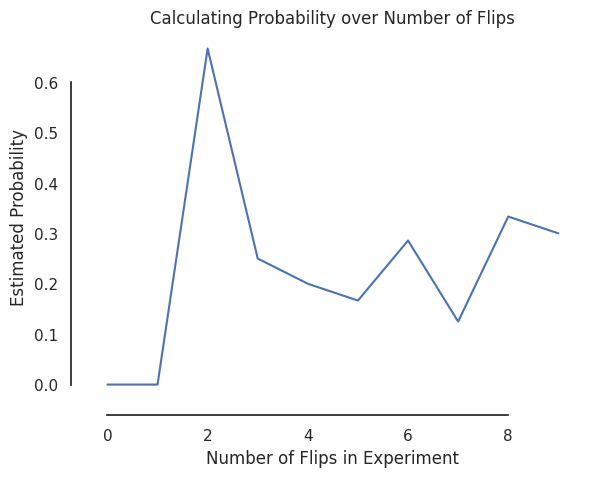

In [ ]:
plt.plot(probs[:10])
plt.ylabel('Estimated Probability')
plt.xlabel('Number of Flips in Experiment');
plt.title("Calculating Probability over Number of Flips")
sns.despine(offset=10, trim=True);  # move axes away 
plt.show()

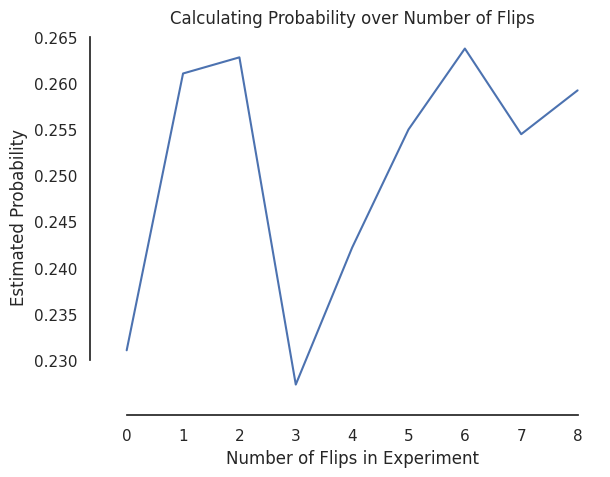

In [ ]:
plt.plot(probs[maximum_flips-10:])
plt.ylabel('Estimated Probability')
plt.xlabel('Number of Flips in Experiment');
plt.title("Calculating Probability over Number of Flips")
sns.despine(offset=10, trim=True);  # move axes away 
plt.show()

## Bokeh For Interactive Plots 

In [ ]:
!pip install bokeh

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 1.5 MB/s eta 0:00:001.5 MB/s eta 0:00:01
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached PyYAML-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (767 kB)
Using cached MarkupSafe-3.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (23 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

p = figure(
    title="Simple Line Plot in Bokeh", 
    x_axis_label='Number of Flips in Experiment', 
    y_axis_label='Estimated Probability', 
    width=580,  # changed from plot_width
    height=380  # changed from plot_height
)

show(p)


Loading BokehJS ...

In [ ]:
p = figure(
    title="Simple Line Plot in Bokeh", 
    x_axis_label='Number of Flips in Experiment', 
    y_axis_label='Estimated Probability', 
    width=580,  # changed from plot_width
    height=380  # changed from plot_height
)

In [ ]:
# Add a line renderer with legend and line thickness
x = range(1, maximum_flips)
p.line(x=x, y=probs)

# Show the results
show(p)

SerializationError: can't serialize <class 'range'>